In [44]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2
k=10 #because there are 10 classes
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

In [45]:
print(trainImages.shape,trainLabels.shape,testImages.shape,testLabels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [46]:
testGreyImagesList = []
trainGreyImagesList = []

for i in range(trainImages.shape[0]): 
    trainGreyImage = cv2.cvtColor(trainImages[i], cv2.COLOR_BGR2GRAY) 
    trainImagesFloat = trainGreyImage.astype('float32')
    trainNorm = trainImagesFloat / 255.0
    trainGreyImagesList.append(trainNorm)
    
for i in range(testImages.shape[0]): 
    testGreyImage = cv2.cvtColor(testImages[i], cv2.COLOR_BGR2GRAY) 
    testImagesFloat = testGreyImage.astype('float32')
    testNorm = testImagesFloat / 255.0
    testGreyImagesList.append(testNorm)

trainGreyImages = np.asarray(trainGreyImagesList)
testGreyImages = np.asarray(testGreyImagesList)
# Flattening the images
testImagesNorm = testGreyImages.reshape((10000, 1024))
print(testImagesNorm.shape,testLabels.shape)

(10000, 1024) (10000, 1)


In [4]:
randomIndex=[np.random.randint(len(testImagesNorm)) for i in range(k)]
randomCentroids=[]
for i in randomIndex:
    randomCentroids.append(testImagesNorm[i])    
print(len(randomCentroids))

10


In [5]:
def formClusters(testImagesNorm,k,centroids):
    clusterArr=[]
    for i in range(len(testImagesNorm)):
        dist=[]
        for j in range(k):
            dist.append(np.linalg.norm(np.subtract(testImagesNorm[i],centroids[j])))
        index=np.argmin(dist) 
        clusterArr.append(index) 
    return np.asarray(clusterArr)

def determineNewCentroids(testImagesNorm,k,clusters):
    centroidArr = []
    for i in range(k):
        temp=[]
        for j in range(len(testImagesNorm)):
            if clusters[j]==i:
                temp.append(testImagesNorm[j])
        centroidArr.append(np.mean(temp,axis=0))
    return np.asarray(centroidArr)

In [6]:
clusters = formClusters(testImagesNorm,k,randomCentroids)
difference = 100
previousCentroids = randomCentroids
while(difference>0.0001):
    print("Difference is ",difference)
    centroids = determineNewCentroids(testImagesNorm,k,clusters)
    clusters = formClusters(testImagesNorm,k,centroids)
    currentCentroids = centroids
    #determine the difference
    difference = 0
    for i in range(len(currentCentroids)):
        difference = difference + np.linalg.norm(previousCentroids[i]-currentCentroids[i])
    previousCentroids = currentCentroids
    
print(clusters.shape)

Difference is  100
Difference is  45.7153217792511
Difference is  11.579470217227936
Difference is  10.227577477693558
Difference is  8.252323627471924
Difference is  6.022965878248215
Difference is  4.363273918628693
Difference is  3.646614708006382
Difference is  2.9782235249876976
Difference is  2.08658891543746
Difference is  1.6204001642763615
Difference is  1.4994089491665363
Difference is  1.2447259295731783
Difference is  1.0738351698964834
Difference is  0.9563706163316965
Difference is  0.9975295960903168
Difference is  0.8789221867918968
Difference is  0.7944910824298859
Difference is  0.8454411327838898
Difference is  0.8652475699782372
Difference is  0.7933625355362892
Difference is  0.7445221431553364
Difference is  0.7189163416624069
Difference is  0.7204544339329004
Difference is  0.7509202342480421
Difference is  0.8199230572208762
Difference is  0.8642615377902985
Difference is  0.7751005720347166
Difference is  0.688013968989253
Difference is  0.6365042245015502
Diff

In [7]:
#ASC
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(testImagesNorm, clusters)
print("Average Silhouette Coefficient is ",silhouette_avg)

Average Silhouette Coefficient is  0.05354544


In [8]:
#Dunn's Index
from sklearn.metrics import pairwise_distances
from validclust import dunn
dist = pairwise_distances(testImagesNorm)
print(dunn(dist, clusters))

0.08885104


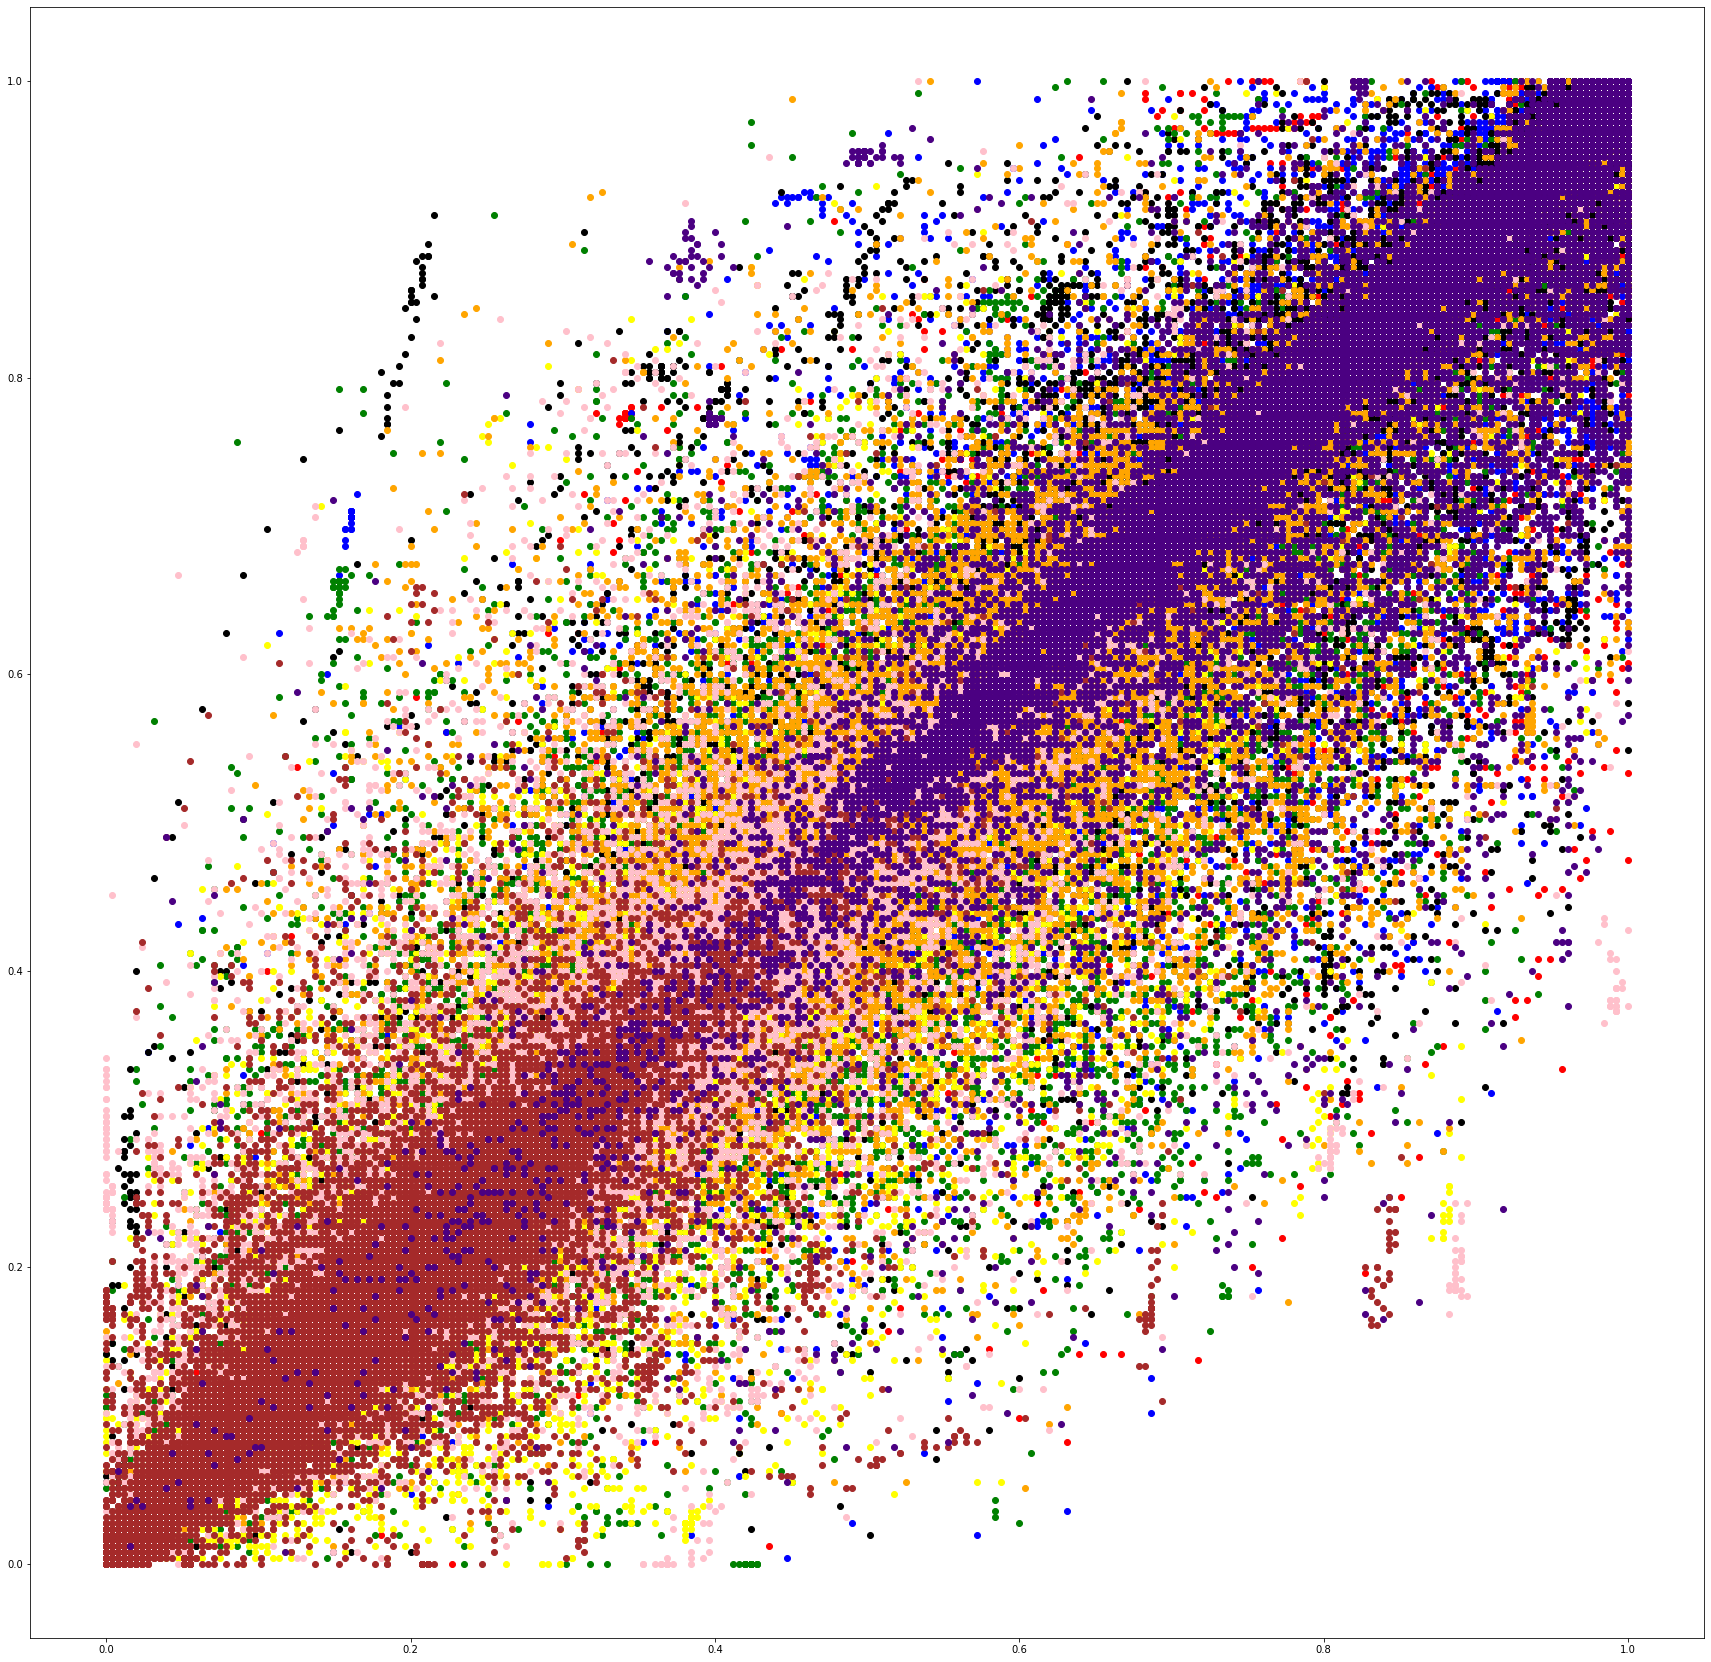

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(30, 30), facecolor='w', edgecolor='k')
plt.scatter(testGreyImages[np.where(clusters == 0)[0],0],testGreyImages[np.where(clusters == 0)[0],1], label='Horror', c='r',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 1)[0],0],testGreyImages[np.where(clusters == 1)[0],1], label='Horror', c='b',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 2)[0],0],testGreyImages[np.where(clusters == 2)[0],1], label='Horror', c='k',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 3)[0],0],testGreyImages[np.where(clusters == 3)[0],1], label='Horror', c='green',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 4)[0],0],testGreyImages[np.where(clusters == 4)[0],1], label='Horror', c='yellow',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 5)[0],0],testGreyImages[np.where(clusters == 5)[0],1], label='Horror', c='black',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 6)[0],0],testGreyImages[np.where(clusters == 6)[0],1], label='Horror', c='orange',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 7)[0],0],testGreyImages[np.where(clusters == 7)[0],1], label='Horror', c='pink',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 8)[0],0],testGreyImages[np.where(clusters == 8)[0],1], label='Horror', c='brown',marker='o')
plt.scatter(testGreyImages[np.where(clusters == 9)[0],0],testGreyImages[np.where(clusters == 9)[0],1], label='Horror', c='indigo',marker='o')

In [86]:
# Assignment 2 part 2
from tensorflow.keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input
model = Sequential()
# building encoder - encoder layer
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (32,32,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary() 

#decoder layer
decodeModel = Sequential()
decodeModel.add(Conv2D(15, 3, activation= 'relu', padding='same'))
decodeModel.add(UpSampling2D(2))
decodeModel.add(Conv2D(30, 3, activation= 'relu', padding='same'))
decodeModel.add(UpSampling2D(2))
decodeModel.add(Conv2D(1,3,activation='sigmoid', padding= 'same'))

inp = Input(shape = (32,32,1))
code = model(inp)
reconstruction = decodeModel(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary() 
autoencoder.fit(trainImages, trainImages,epochs=15,batch_size=128)
print("done")

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 32, 32, 30)        300       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 15)        4065      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 15)          0         
Total params: 4,365
Trainable params: 4,365
Non-trainable params: 0
_________________________________________________________________
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 1)]       0         
__________________________________

In [88]:
print("train images",trainImages.shape)
trainImages = np.reshape(trainGreyImages, (len(trainGreyImages), 32, 32, 1))
print("train images",trainImages.shape)

train images (50000, 32, 32, 1)
train images (50000, 32, 32, 1)


In [89]:
encodedData = model.predict(trainImages)
print("encoded shape ",encodedData.shape)

encoded shape  (50000, 8, 8, 15)


In [90]:
encodedData = encodedData.reshape((50000, 960))
print("reshaped encoded data ",encodedData.shape)

reshaped encoded data  (50000, 960)


In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(encodedData)
print("done")

done


In [92]:
    silhouette_avg = silhouette_score(encodedData, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.03674104


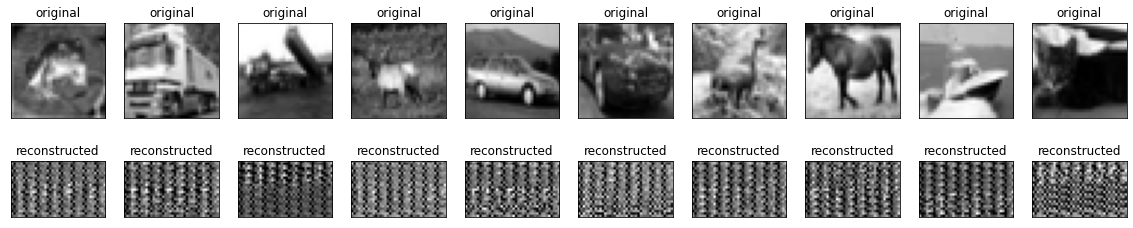

In [93]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(trainImages[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encodedData[i].reshape(24,40))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [94]:
encodedData = np.reshape(encodedData, (len(encodedData), 8, 8, 15))
print("encodedData",encodedData.shape)
decodedData = decodeModel.predict(encodedData)
print("decodedData",decodedData.shape)
print("done")

encodedData (50000, 8, 8, 15)
decodedData (50000, 32, 32, 1)
done


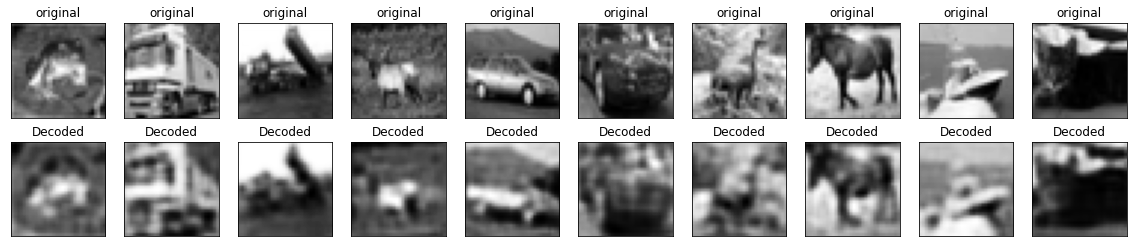

In [95]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(trainImages[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedData[i].reshape(32,32))
    plt.title("Decoded")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()